In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Main DataFrame Name: "grouped_frame"

grouped_frame = pd.read_csv('grouped_data.csv')

grouped_frame.set_index(['Country Name', 'Indicator Name'], inplace = True)
grouped_frame.sort_values(by = ['Country Name'], inplace = True)


for column in grouped_frame.columns:
    grouped_frame[column].astype('float')


Displaying Potential Climate Indicators for Sweden


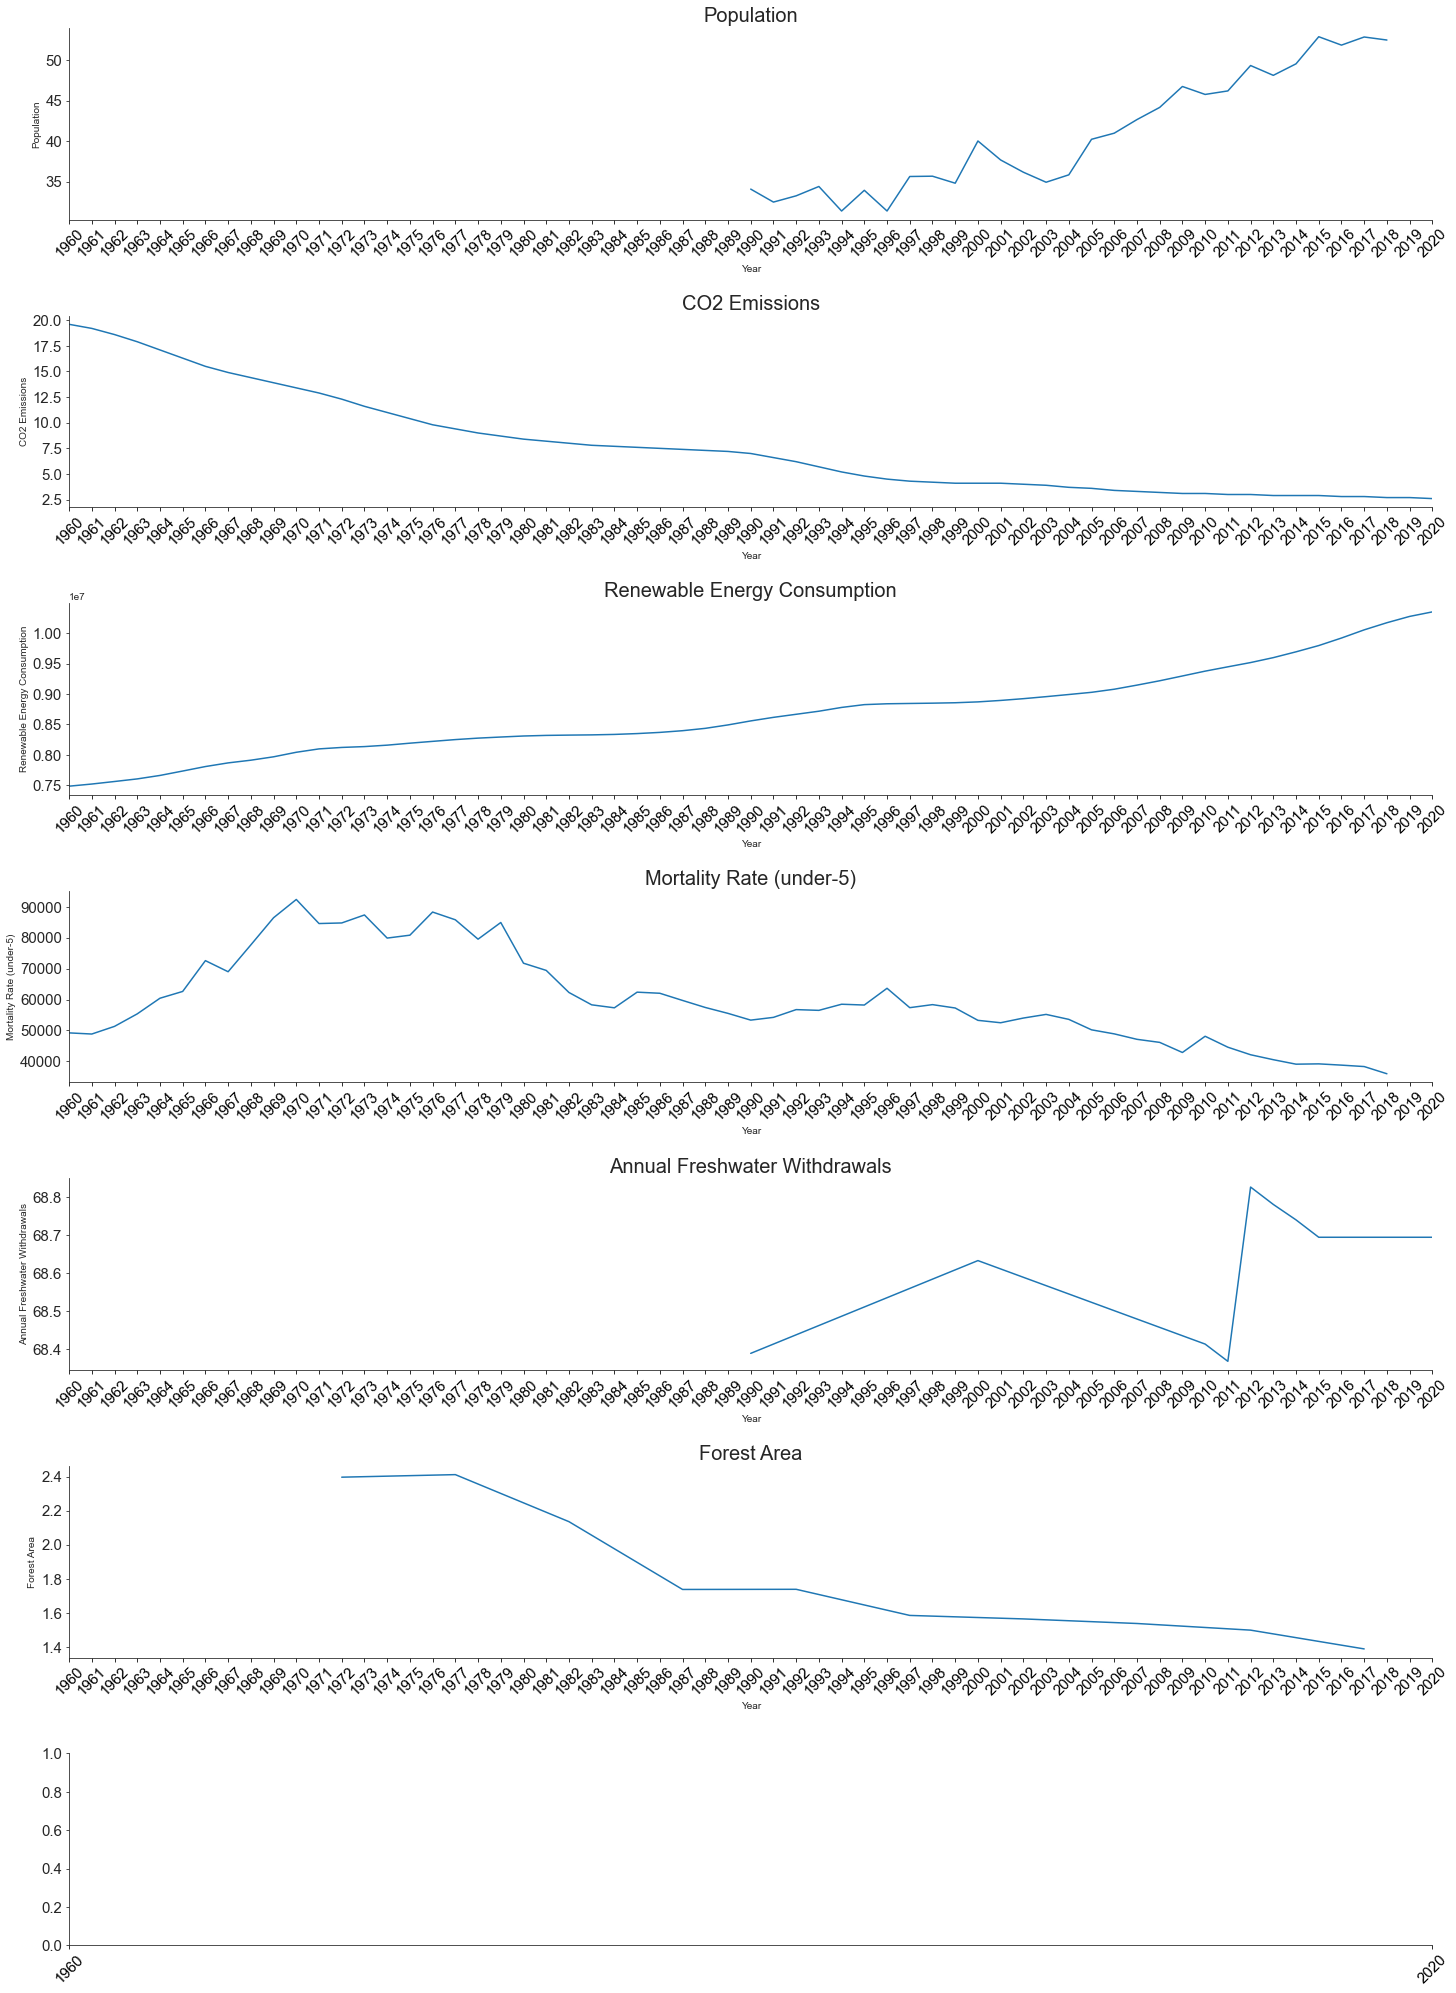

In [152]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

def create_subset(df, indicators, country):
    subset = df.reset_index()
    subset = subset[
            (subset['Country Name'] == country)
        ].drop(columns = 'Country Name'
        ).set_index('Indicator Name').T

    subset.columns.name = None
    subset.index.name = 'Year'
    subset.reset_index(inplace = True)
    subset.columns = [
        'Year', 
        'Population', 
        'CO2 Emissions', 
        'Renewable Energy Consumption', 
        'Mortality Rate (under-5)', 
        'Annual Freshwater Withdrawals', 
        'Forest Area'
    ]
    
    return subset, subset.columns.tolist()[1:]
    
def plot_data(df, country):
    
    year = mdates.YearLocator()
    sns.set_style("ticks",{"xtick.color": 'black','axes.grid': False})
    fig, axs = plt.subplots(7,figsize = (20,30), gridspec_kw={'height_ratios':[1,1,1,1,1,1,1]}, sharex = False)
    #sns.lineplot(data = subset, x = 'Year', y = subset.indicators, ax = axs[0])
    
    indicators = df.index.get_level_values(1).unique().tolist()
    #countries = df.index.get_level_values(0).unique().tolist()
    
    subset, cleaned_indicator = create_subset(df, indicators, country)
    sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[0], ax = axs[0]).set_title(cleaned_indicator[0], fontsize = 20)
    sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[1], ax = axs[1]).set_title(cleaned_indicator[1], fontsize = 20)
    sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[2], ax = axs[2]).set_title(cleaned_indicator[2], fontsize = 20)
    sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[3], ax = axs[3]).set_title(cleaned_indicator[3], fontsize = 20)
    sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[4], ax = axs[4]).set_title(cleaned_indicator[4], fontsize = 20)
    sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[5], ax = axs[5]).set_title(cleaned_indicator[5], fontsize = 20)
        
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(hspace = 0.5,
                       top = 0.9)
    min_ = min(subset.Year)
    max_ = max(subset.Year)
    for ax in axs:
        ax.set_xlim(min_,max_)
        ax.ylabel = ""
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
            
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(15) 
        
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(15)
    
    return plt
    
    
#visual = plot_data(grouped_frame)
#visual.show()

countries = grouped_frame.index.get_level_values(0).unique().tolist()
country = countries[234]
visual =  plot_data(grouped_frame, country)
print(f'Displaying Potential Climate Indicators for {country}')
visual.show()

In [138]:
us_subset = grouped_frame.reset_index()
us_subset[(us_subset['Country Name'] == 'United States')]

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1518,United States,Forest area (% of land area),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.377947e+01,3.380953e+01,3.383960e+01,3.386966e+01,3.389972e+01,3.389972e+01,3.386693e+01,3.386693e+01,3.386693e+01,3.386693e+01
1519,United States,CO2 emissions (kt),2890696.1,2.880506e+06,2.987208e+06,3.119231e+06,3.255995e+06,3.390923e+06,3.561878e+06,3.695709e+06,...,5.172100e+06,4.950210e+06,5.089500e+06,5.102580e+06,4.982790e+06,4.888640e+06,4.813720e+06,4.981300e+06,NaN,NaN
1520,United States,"Mortality rate, under-5 (per 1,000 live births)",30.1,2.950000e+01,2.890000e+01,2.830000e+01,2.770000e+01,2.710000e+01,2.640000e+01,2.570000e+01,...,7.200000e+00,7.100000e+00,7.000000e+00,6.900000e+00,6.800000e+00,6.700000e+00,6.600000e+00,6.500000e+00,6.400000e+00,6.300000e+00
1521,United States,Renewable energy consumption (% of total final...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.364200e+00,8.728100e+00,9.083300e+00,9.220500e+00,9.033900e+00,9.456300e+00,9.919100e+00,1.010720e+01,NaN,NaN
1522,United States,"Population, total",180671000.0,1.836910e+08,1.865380e+08,1.892420e+08,1.918890e+08,1.943030e+08,1.965600e+08,1.987120e+08,...,3.115835e+08,3.138777e+08,3.160599e+08,3.183863e+08,3.207390e+08,3.230718e+08,3.251221e+08,3.268382e+08,3.283300e+08,3.294841e+08
1523,United States,"Annual freshwater withdrawals, total (% of int...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.522493e+01,NaN,NaN,NaN,NaN,1.576991e+01,NaN,NaN,NaN
